## K-Means

* import packages
* load data
* create pandas dataframe
* Create the class and target columns
* clean data
* merge
* plot
* start k-means
* model
* fit
* predict
* plot (points)
* new labels
* predict new labels
* plot new labels (new_points)
* plot all together

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt

In [3]:
# load data
iris_data = load_iris()

In [4]:
# Create pd DF the same way you did the first day
# Create the class and target columns and remove de cm from the columns names


def create_df():
    df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df["target"] = iris_data.target
    df["class"] = iris_data.target_names[iris_data.target]
    df.columns = [col.replace("(cm)", "").strip() for col in df.columns]
    return df


df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
146,6.3,2.5,5.0,1.9,2,virginica
30,4.8,3.1,1.6,0.2,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
0,5.1,3.5,1.4,0.2,0,setosa
113,5.7,2.5,5.0,2.0,2,virginica
143,6.8,3.2,5.9,2.3,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
23,5.1,3.3,1.7,0.5,0,setosa
27,5.2,3.5,1.5,0.2,0,setosa
149,5.9,3.0,5.1,1.8,2,virginica


In [5]:
# From our data we will only get variable columns as np.array
x = 0
x = df_iris[["sepal length", "sepal width", "petal length", "petal width"]].to_numpy()
print(x.shape)

# or

# x_iloc = df_iris.iloc[:,:4].to_numpy()
# print(x_iloc)

(150, 4)


In [6]:
# merge
mergings = 0
mergings = linkage(x, "complete")

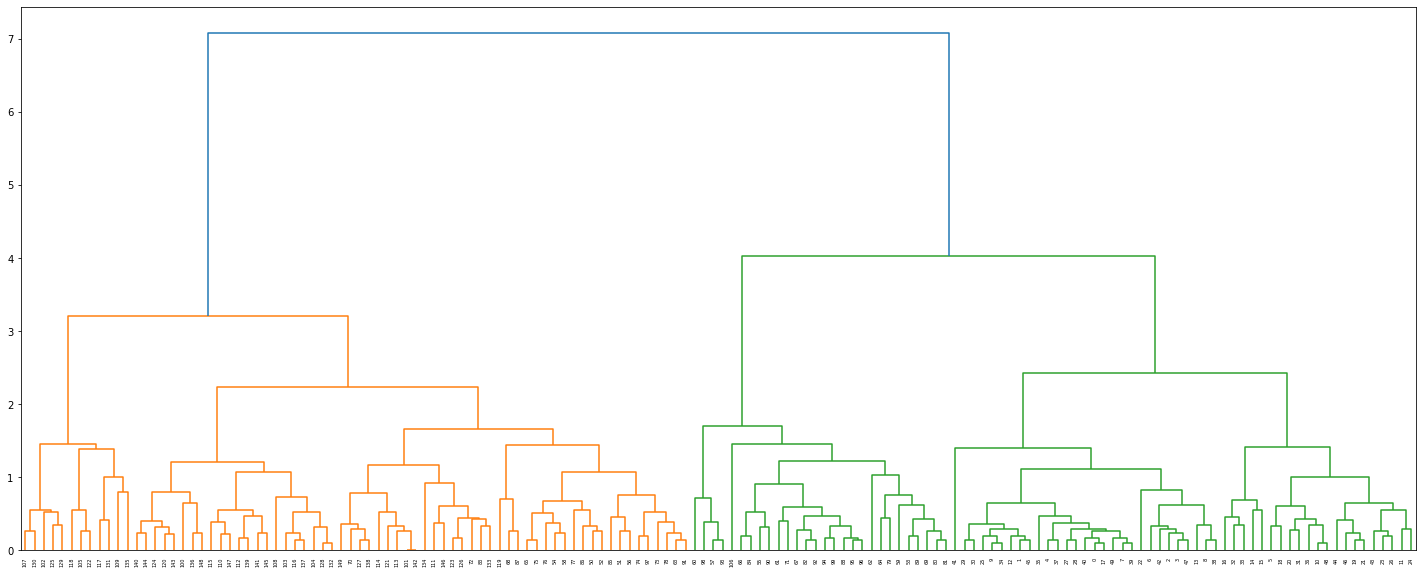

In [7]:
# plot
dn = 0
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(mergings)
plt.show()

In [8]:
# KMEANS

############

from sklearn.cluster import KMeans

df = pd.read_csv("./data/ch1ex1.csv")
points = df.values

new_df = pd.read_csv("./data/ch1ex2.csv")
new_points = new_df.values

In [9]:
# model = 0
model = KMeans(n_clusters=3)

In [11]:
model.fit(points)

KMeans(n_clusters=3)

In [12]:
labels = model.predict(points)
labels.shape

(300,)

In [13]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
# If the label is 0 they go into data_0
# If the label is 1 they go into data_1
# If the label is 2 they go into data_2


def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    for i in range(labels.shape[0]):
        if labels[i] == 0:
            data_0.append(points[i])
        elif labels[i] == 1:
            data_1.append(points[i])
        else:
            data_2.append(points[i])
    
    return np.array(data_0), np.array(data_1), np.array(data_2)


data_0, data_1, data_2 = separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(94, 2)
(95, 2)
(111, 2)


Text(0.5, 1.0, 'K-MEANS')

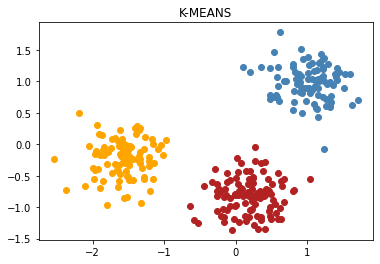

In [14]:
# plotting the data
plt.scatter(data_0[:, 0], data_0[:, 1], c="steelblue")
plt.scatter(data_1[:, 0], data_1[:, 1], c="orange")
plt.scatter(data_2[:, 0], data_2[:, 1], c="firebrick")
plt.title("K-MEANS")

In [15]:
new_labels = model.predict(new_points)
new_labels


array([0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2,
       1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1], dtype=int32)

In [16]:
# using enumerate


def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    for index, i in enumerate(labels):
        if i == 0:
            data_0.append(points[index])
        elif i == 1:
            data_1.append(points[index])
        elif i == 2:
            data_2.append(points[index])

    return np.array(data_0), np.array(data_1), np.array(data_2)


data_0, data_1, data_2 = separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(94, 2)
(95, 2)
(111, 2)


In [17]:
# separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

new_0, new_1, new_2 = separate_labels(new_labels, new_points)
abs(new_0.shape[0])
abs(new_1.shape[0])
abs(new_2.shape[0])


32

Text(0.5, 1.0, 'K-MEANS - new')

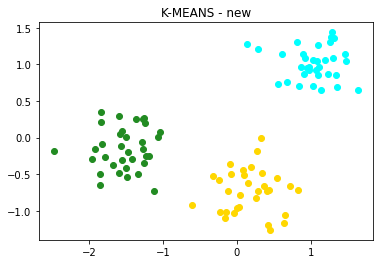

In [18]:
# plot the new labels

plt.scatter(new_0[:, 0], new_0[:, 1], c="aqua")
plt.scatter(new_1[:, 0], new_1[:, 1], c="forestgreen")
plt.scatter(new_2[:, 0], new_2[:, 1], c="gold")
plt.title("K-MEANS - new")

Text(0.5, 1.0, 'K-MEANS - ALL')

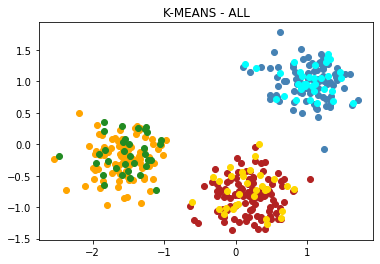

In [19]:
# plot all the points together

plt.scatter(data_0[:, 0], data_0[:, 1], c="steelblue")
plt.scatter(data_1[:, 0], data_1[:, 1], c="orange")
plt.scatter(data_2[:, 0], data_2[:, 1], c="firebrick")

plt.scatter(new_0[:, 0], new_0[:, 1], c="aqua")
plt.scatter(new_1[:, 0], new_1[:, 1], c="forestgreen")
plt.scatter(new_2[:, 0], new_2[:, 1], c="gold")
plt.title("K-MEANS - ALL")